In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics


In [2]:
#read the csv file
ak=pd.read_csv("C:\\Users\\user\\OneDrive\\Documents\\zomato.csv")

In [3]:
# this command is to show top 5 rows
ak.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# this command is use to drop the columns
ak.drop(['url','name','reviews_list','phone','menu_item','listed_in(city)','address','dish_liked'],axis=1,inplace=True)

In [5]:
ak.head(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


In [6]:
# this command is use to rename the existing column
ak.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type'},inplace=True)

In [7]:
ak.head(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


In [8]:
# this command shows all the duplicated value present in data set
ak.duplicated().sum()

16946

In [9]:
#this command is use to drop duplicate values
ak.drop_duplicates(inplace=True)

In [10]:
ak.duplicated().sum()

0

In [11]:
ak.shape

(34771, 9)

In [12]:
# this command is use for checking null values present in data set
ak.isnull().sum()

online_order       0
book_table         0
rate            3567
votes              0
location           4
rest_type        146
cuisines          23
cost             210
type               0
dtype: int64

In [13]:
# this command is use for checking unique values present in rate column
ak['rate'].nunique()

64

In [14]:
ak['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
# this command is use to replace values present in column rate
ak['rate'].replace(["NEW",'-'],0.0,inplace=True)

In [16]:
ak['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 0.0, '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
import re
ak['RATE']=ak['rate'].str.extract(r'^(\d{1}\.\d{1})',expand=False)
ak.drop(('rate'),axis=1,inplace=True)

In [18]:
ak.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,RATE
0,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,4.1
1,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,4.1
2,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,3.8
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,3.7
4,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,3.8


In [19]:
# by using this command we remove all the words which is coming after,(called spliting)
ak['cuisines']=ak['cuisines'].map(lambda x :str(x).split(",")[0])

In [20]:
ak.head(1)

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,RATE
0,Yes,Yes,775,Banashankari,Casual Dining,North Indian,800,Buffet,4.1


In [21]:
ak['rest_type']=ak['rest_type'].map(lambda x: str(x).split(",")[0])

In [22]:
ak.isnull().sum()

online_order       0
book_table         0
votes              0
location           4
rest_type          0
cuisines           0
cost             210
type               0
RATE            4874
dtype: int64

In [23]:
ak['location'].mode()

0    BTM
Name: location, dtype: object

In [24]:
ak['location'].fillna('BTM',inplace=True)


In [25]:
ak["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [26]:
ak['cost']=ak['cost'].map(lambda x : str(x).replace(",",''))

In [27]:
ak.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,RATE
0,Yes,Yes,775,Banashankari,Casual Dining,North Indian,800,Buffet,4.1
1,Yes,No,787,Banashankari,Casual Dining,Chinese,800,Buffet,4.1


In [28]:
ak.isnull().sum()

online_order       0
book_table         0
votes              0
location           0
rest_type          0
cuisines           0
cost               0
type               0
RATE            4874
dtype: int64

In [29]:
# this command is used to drop nan values present in column cost
ak.drop(ak[ak['cost'] == "nan"].index, inplace = True)
ak.dropna(inplace=True)

In [30]:
ak['cost'] = ak['cost'].astype('int')

In [31]:
ak.isnull().sum()

online_order    0
book_table      0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
RATE            0
dtype: int64

In [32]:
%matplotlib inline
import seaborn as sns

<Axes: xlabel='online_order', ylabel='count'>

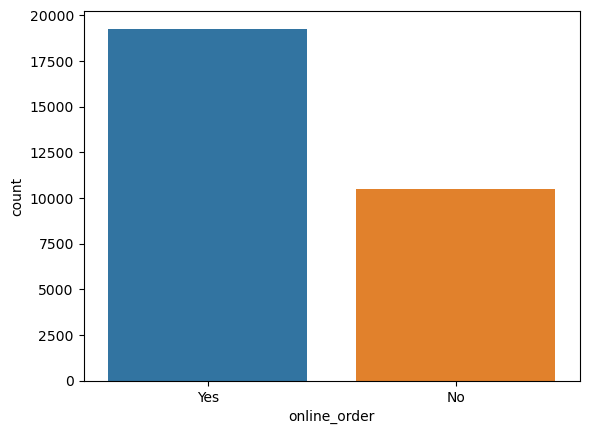

In [33]:
sns.countplot(data=ak,x='online_order')

<Axes: xlabel='book_table', ylabel='count'>

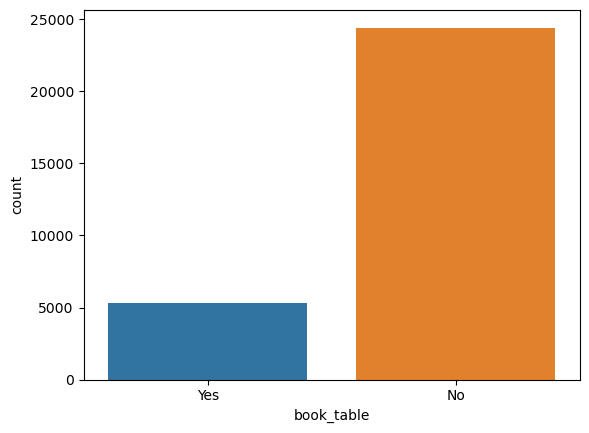

In [34]:
sns.countplot(data=ak,x="book_table")

In [35]:
ak['RATE']=pd.to_numeric(ak['RATE'])

In [36]:
ak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29734 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  29734 non-null  object 
 1   book_table    29734 non-null  object 
 2   votes         29734 non-null  int64  
 3   location      29734 non-null  object 
 4   rest_type     29734 non-null  object 
 5   cuisines      29734 non-null  object 
 6   cost          29734 non-null  int32  
 7   type          29734 non-null  object 
 8   RATE          29734 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 2.2+ MB


In [37]:
ak1=ak.groupby('book_table')['RATE'].mean()
ak1

book_table
No     3.636581
Yes    4.164848
Name: RATE, dtype: float64

<Axes: xlabel='book_table'>

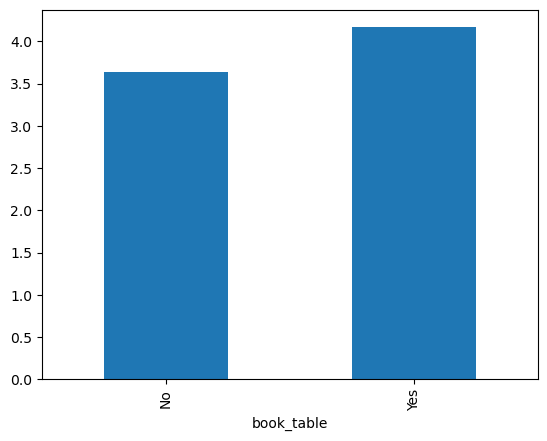

In [38]:
ak1.plot.bar()

([<matplotlib.patches.Wedge at 0x23d010c4490>,
 [Text(-0.49336367324179925, 0.9831542533729687, ''),
  Text(0.49336367324179914, -0.9831542533729687, '')])

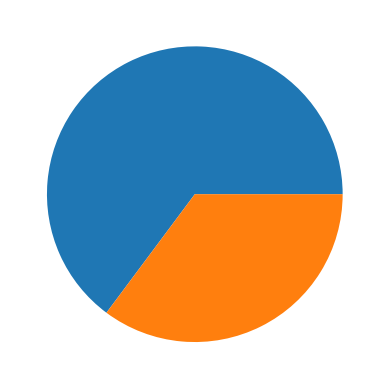

In [39]:
plt.pie(ak["online_order"].value_counts())


<Axes: xlabel='location'>

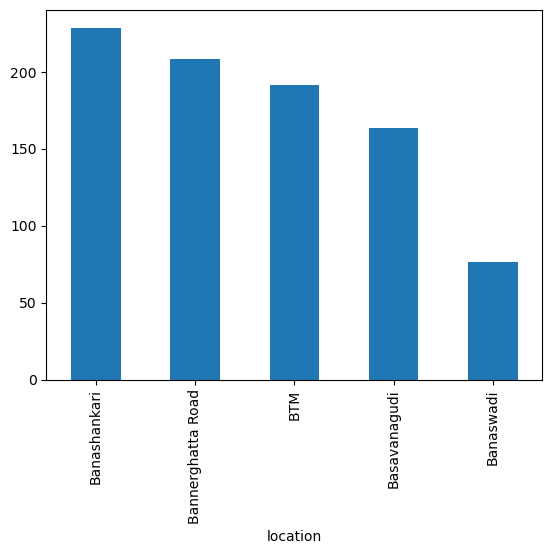

In [40]:
ak2=ak.groupby('location')['votes'].mean()
bstloc=ak2.head().sort_values(ascending=False)
bstloc.plot.bar()

<Axes: xlabel='location'>

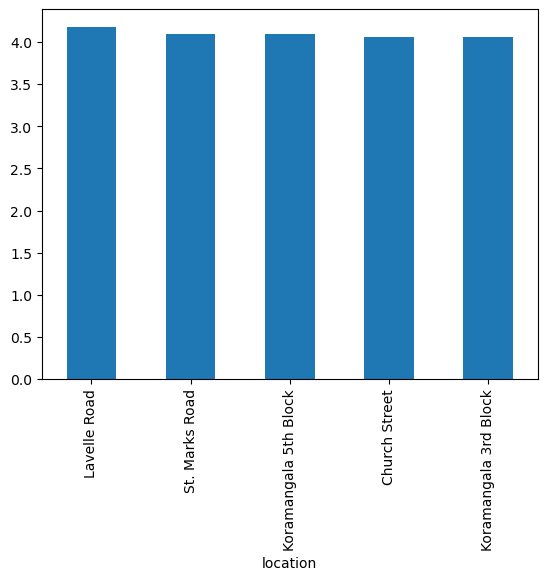

In [41]:
ak3=ak.groupby('location')['RATE'].mean()
locrat=ak3.sort_values(ascending=False).head()
locrat.plot.bar()

<Axes: xlabel='rest_type', ylabel='count'>

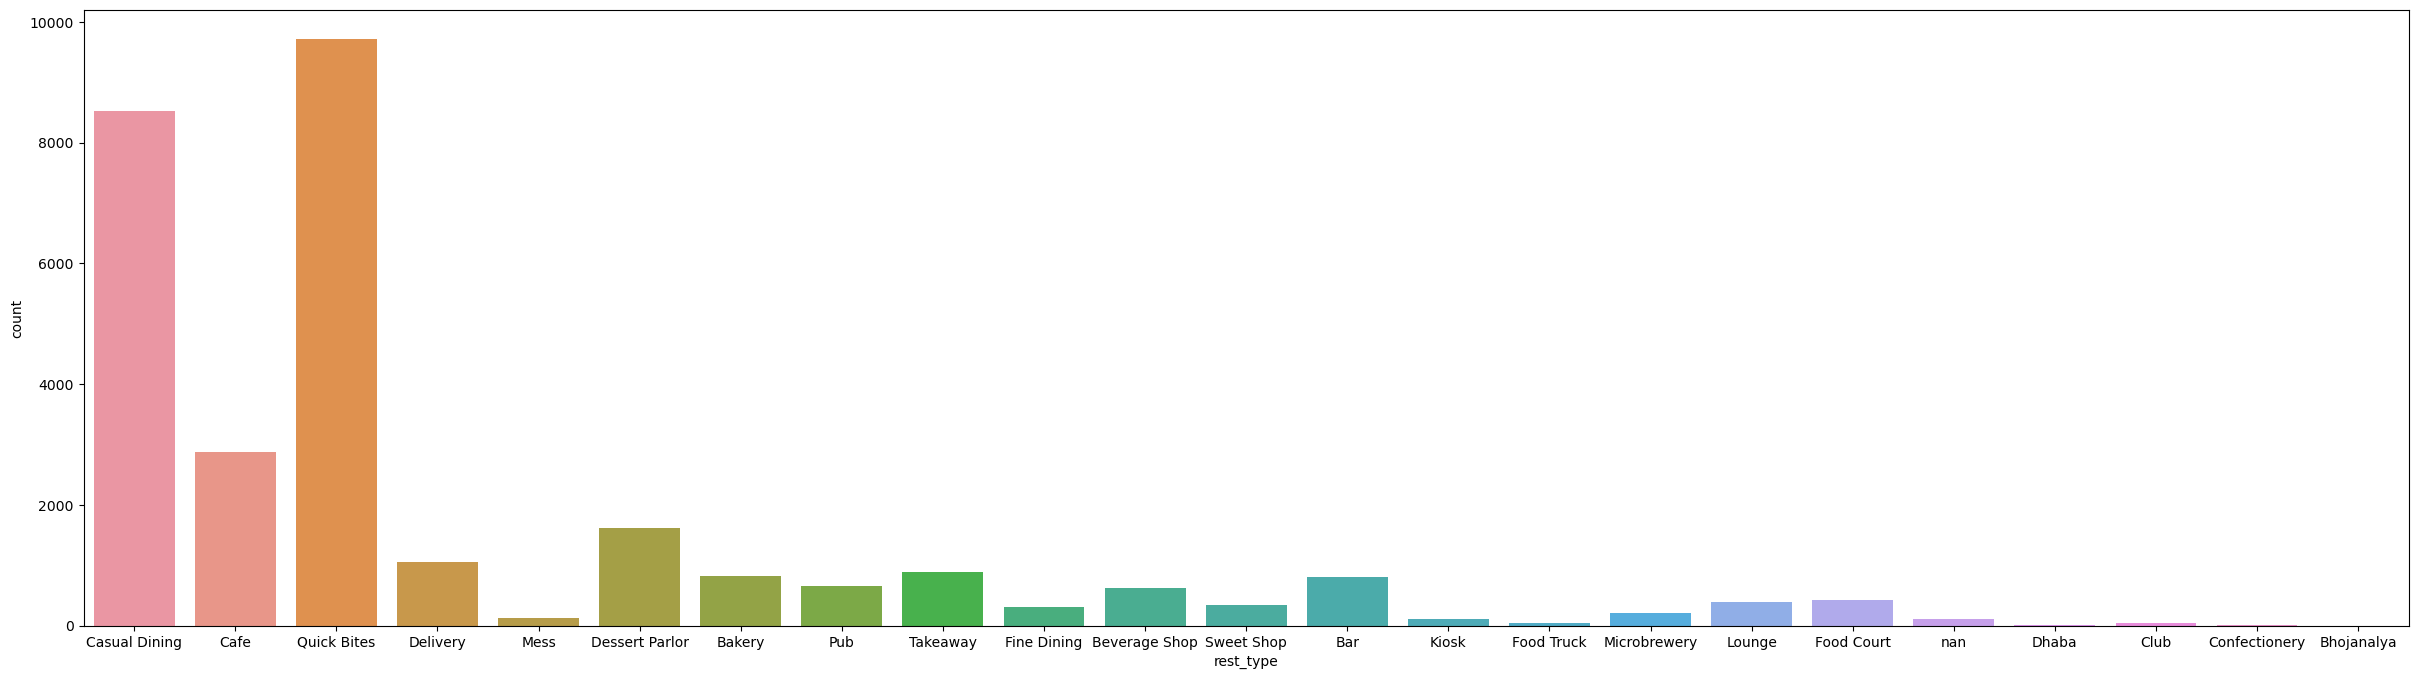

In [42]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.countplot(data=ak,x='rest_type')


<Axes: xlabel='type', ylabel='count'>

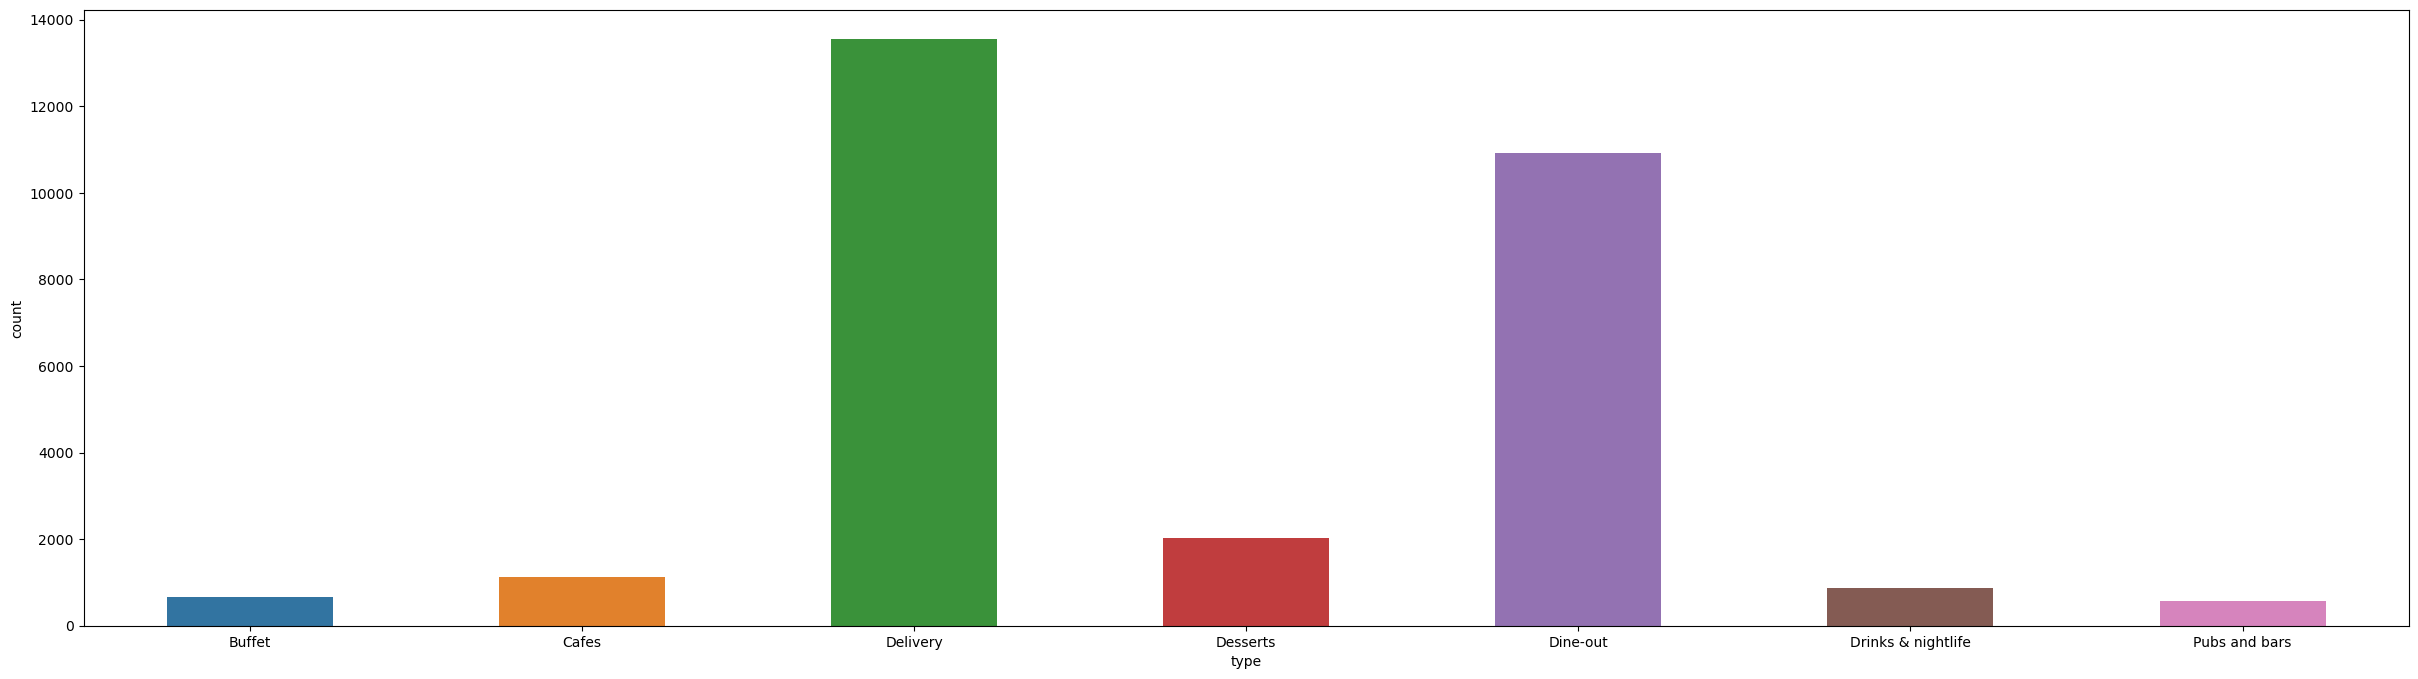

In [43]:
fig, ax = plt.subplots(figsize=(30,8))
sns.countplot(data=ak,x='type',width=0.5)

In [ ]:
ak.head(2)

In [45]:
ak.replace({"online_order":{'No':0,'Yes':1}},inplace=True)

In [46]:
ak.replace({"book_table":{'No':0,'Yes':1}},inplace=True)

In [47]:
ak.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,RATE
0,1,1,775,Banashankari,Casual Dining,North Indian,800,Buffet,4.1
1,1,0,787,Banashankari,Casual Dining,Chinese,800,Buffet,4.1


<Axes: xlabel='online_order', ylabel='RATE'>

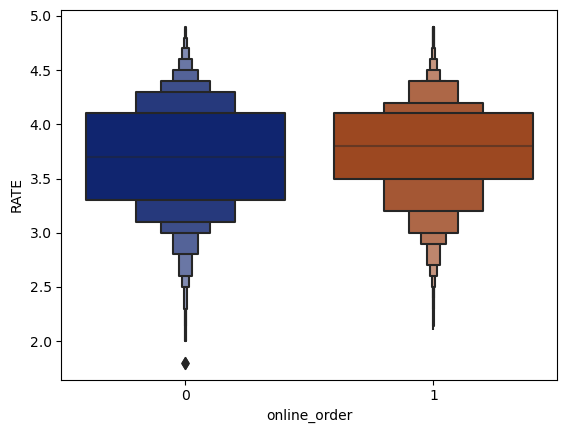

In [48]:
sns.boxenplot(data=ak,x="online_order",y="RATE",palette="dark")

[Text(0.5, 1.0, 'Best Location')]

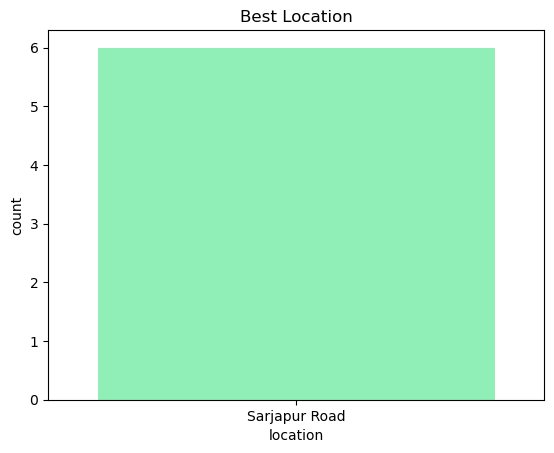

In [49]:
temp = ak.loc[(ak['RATE']>4.7) & (ak['votes']>16000)]
plot = sns.countplot(x='location',data=temp,palette='rainbow')
plot.set(title='Best Location')

In [50]:
corr_mat=ak.corr()
corr_mat

C:\Users\user\AppData\Local\Temp\ipykernel_1964\4202217381.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=ak.corr()


,online_order,book_table,votes,cost,RATE
online_order,1.000000,-0.067039,-0.022863,-0.181540,0.057144
book_table,-0.067039,1.000000,0.391620,0.629035,0.446730
votes,-0.022863,0.391620,1.000000,0.378695,0.448940
cost,-0.181540,0.629035,0.378695,1.000000,0.412368
RATE,0.057144,0.446730,0.448940,0.412368,1.000000


<Axes: >

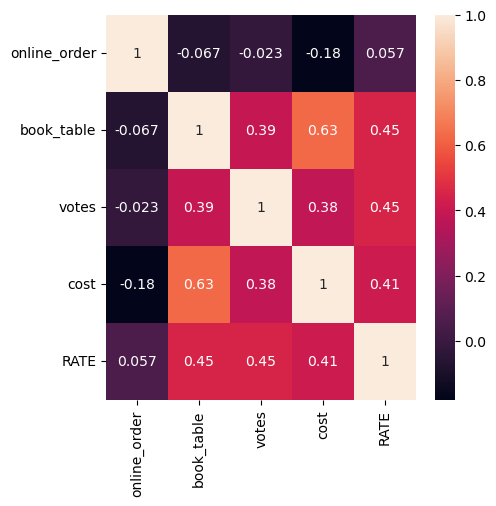

In [51]:
# this command is use to show the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat,annot=True)

In [52]:
ak.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,RATE
0,1,1,775,Banashankari,Casual Dining,North Indian,800,Buffet,4.1
1,1,0,787,Banashankari,Casual Dining,Chinese,800,Buffet,4.1


In [53]:
# this command is use to change string value to integer value
label_encoder = LabelEncoder()

In [54]:

ak['location'] = label_encoder.fit_transform(ak['location'])
ak['rest_type'] = label_encoder.fit_transform(ak['rest_type'])
ak['cuisines'] = label_encoder.fit_transform(ak['cuisines'])
ak['type'] = label_encoder.fit_transform(ak['type'])


In [55]:
ak.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,RATE
0,1,1,775,1,5,61,800,0,4.1
1,1,0,787,1,5,22,800,0,4.1


In [56]:
ak['cost'].value_counts()

400     3770
300     3490
500     2901
600     2320
200     2124
        ... 
130        2
5000       1
3700       1
70         1
80         1
Name: cost, Length: 63, dtype: int64

In [57]:
values_to_drop = [5000,3700,70,80]
ak = ak[~(ak['cost'].isin(values_to_drop))]

In [58]:
X=ak.drop(columns=['cost'],axis=1)
Y=ak['cost']

In [59]:
X

,online_order,book_table,votes,location,rest_type,cuisines,type,RATE
0,1,1,775,1,5,61,0,4.1
1,1,0,787,1,5,22,0,4.1
2,1,0,918,1,4,19,0,3.8
3,0,0,88,1,19,75,0,3.7
4,0,0,166,4,5,61,0,3.8
...,...,...,...,...,...,...,...,...
51709,0,0,34,88,5,61,6,3.7
51711,0,0,81,88,5,2,6,2.5
51712,0,0,27,88,1,24,6,3.6
51715,0,1,236,26,1,28,6,4.3


In [60]:
Y

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: cost, Length: 29730, dtype: int32

In [61]:
# train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=3)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(29730, 8) (23784, 8) (5946, 8)


# ML Algorithms

In [63]:
models = dict()

In [64]:
#Linear regression
lnr=LinearRegression()

In [65]:
lnr.fit(X_train,Y_train)

LinearRegression()

In [66]:
train_score_linreg = str(lnr.score(X_train, Y_train) * 100)
test_score_linreg = str(lnr.score(X_test, Y_test) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["lnr"] = test_score_linreg

Train Score : 49.34%
Test Score : 49.30%


In [67]:
#Random Forest
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [68]:
train_score_forest = str(forest.score(X_train, Y_train)*100)
test_score_forest = str(forest.score(X_test, Y_test)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.28%
Test Score : 95.36%


In [69]:
#XGBooster
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
train_score_xgb = str(xgb.score(X_train, Y_train)*100)
test_score_xgb = str(xgb.score(X_test, Y_test)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 94.05%
Test Score : 91.03%


In [71]:
#decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [72]:
train_score_tree = str(tree.score(X_train, Y_train) * 100)
test_score_tree = str(tree.score(X_test, Y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.95%
Test Score : 93.72%


In [73]:
#K-Nearest neighbour
knr = KNeighborsRegressor()
# Train Model
knr.fit(X_train, Y_train)

KNeighborsRegressor()

In [74]:
train_score_knr = str(knr.score(X_train, Y_train)*100)
test_score_knr = str(knr.score(X_test, Y_test)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 83.34%
Test Score : 71.44%


<BarContainer object of 5 artists>

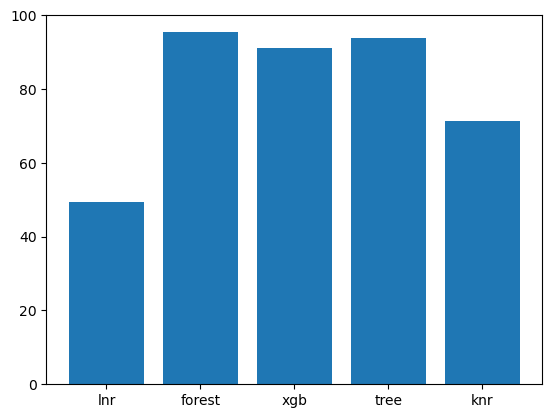

In [75]:
#Finding best models
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

In [76]:
import joblib

In [77]:
joblib.dump(forest,'cost_Predict')

['cost_Predict']

In [78]:
model=joblib.load('cost_Predict')

In [79]:
ak2=pd.DataFrame({
    'online_order':1,
    'book_table':1,
    'votes':775,
    'location':1,
    'rest_type':5,
    'cuisines':61,
    'type':0,
    'RATE':4.1,
},index=[0])

In [80]:
ak2

,online_order,book_table,votes,location,rest_type,cuisines,type,RATE
0,1,1,775,1,5,61,0,4.1


In [81]:
result=model.predict(ak2)

In [82]:
result

array([817.])

In [83]:
print("The price will approximately = Rs.", result)

The price will approximately = Rs. [817.]
